In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


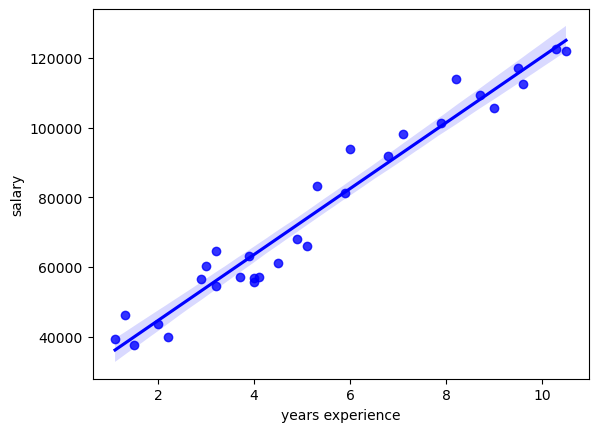

In [6]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'],color='b')
plt.xlabel("years experience")
plt.ylabel("salary")
plt.show()

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [9]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [10]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
X_train

array([[ 1.82088399],
       [-0.82855039],
       [-1.1818083 ],
       [ 1.46762607],
       [ 1.29099711],
       [-0.58126984],
       [-1.11115672],
       [ 0.5138297 ],
       [-0.51061826],
       [ 1.18501974],
       [-0.43996668],
       [-0.01605718],
       [-0.15736034],
       [ 1.7502324 ],
       [-0.47529247],
       [-0.7578988 ],
       [-1.49974043],
       [ 1.00839078],
       [-0.86387618],
       [-0.47529247],
       [ 0.61980707],
       [-0.7578988 ]])

In [14]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [15]:
regression.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=regression.predict(X_test)

In [17]:
y_pred

array([ 74001.58915348,  68252.80708422, 117117.45467296, 100829.23881005,
        82624.76225738,  81666.6319125 ,  37592.63604814,  39508.8967379 ])

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  42543002.05456649
mae:  5259.842805686763
rmse:  6522.499678387611


In [19]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r2 score: ", score)
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

r2 score:  0.9319162300481797
0.9205689350562096


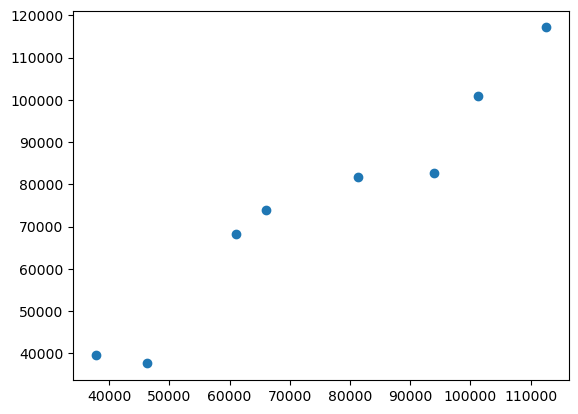

In [20]:
plt.scatter(y_test,y_pred)
plt.show()

In [22]:
residuals=y_test-y_pred
print(residuals)

16    -7972.589153
14    -7141.807084
27    -4482.454673
22      472.761190
19    11315.237743
18     -303.631913
1      8612.363952
2     -1777.896738
Name: Salary, dtype: float64


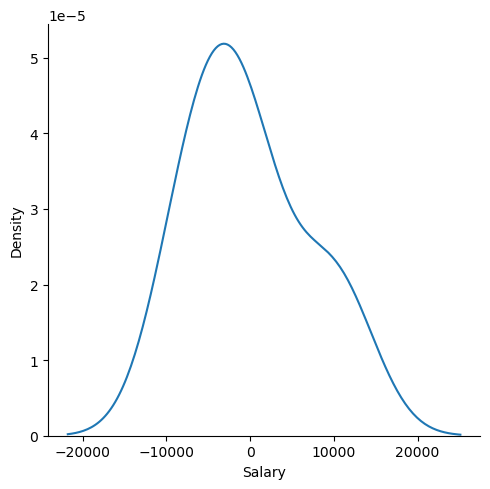

In [23]:
sns.displot(residuals,kind='kde')
plt.show()

In [27]:
regression.coef_

array([27122.68575364])

In [28]:
regression.fit_intercept

True

In [29]:
regression.intercept_

np.float64(76353.36363636363)

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [34]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 43766936.56944445


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2: 0.948935268839565
MSE: 31908441.08972828


In [40]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [41]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'max_depth': [2,3,4,5,6,8,10],
    'min_samples_split': [2,5,10,15],
    'min_samples_leaf': [1,2,4,6],
    'criterion': ['squared_error', 'absolute_error']   
}
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='r2', verbose=2)

In [46]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R² Score: 0.9040922338190025


In [47]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [48]:
print("Best Parameters:", grid_search.best_params_)
print("Best R²:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R²: 0.9108998368276658
